In [86]:
# таблицы сопряженности
# Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, 
#но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь между полом и стилем вождения автомобиля!  
#Ниже представлена таблица сопряженности данных исследования, посвященного этому вопросу.

x=['тормозят', 'притормаживают', 'не тормозят', 'итого']
a=0
b=0
y=[20,11,7]
for i in range(0,3):
    a=a+y[i]
y.append(a)

z=[15,12,9]
for i in range(0,3):
    b=b+z[i]
z.append(b)
print(y)  
print(z)

EY=[]
EZ=[]
total=[]

import pandas as pd

# записываем данные в таблицу
tab = pd.DataFrame({"action": x, "male": y, "female": z})
display(tab) # ухты, симпатичный вывод данных датафрейма

for i in range(0,4):
    sumT=y[i]+z[i]
    total.append(sumT)

tab1 = pd.DataFrame({"action": x, "male": y, "female": z, "всего": total})
display(tab1) 



for m in range(0,4): # в строках
    Ey=total[m]*y[3]/total[3]
    Ez=total[m]*z[3]/total[3]
    EY.append(Ey)
    EZ.append(Ez)

tab2 = pd.DataFrame({"action": x, "male": EY, "female": EZ, "всего": total})
display(tab2) 

dataksi=[]

for i in range(0,3):
    ksi=((abs(y[i]-EY[i]))**2)/EY[i]+((abs(z[i]-EZ[i]))**2)/EZ[i]
    
    dataksi.append(ksi)
   
  
X2=sum(dataksi)
         
print(X2)


[20, 11, 7, 38]
[15, 12, 9, 36]


,action,male,female
0,тормозят,20,15
1,притормаживают,11,12
2,не тормозят,7,9
3,итого,38,36


,action,male,female,всего
0,тормозят,20,15,35
1,притормаживают,11,12,23
2,не тормозят,7,9,16
3,итого,38,36,74


,action,male,female,всего
0,тормозят,17.972973,17.027027,35
1,притормаживают,11.810811,11.189189,23
2,не тормозят,8.216216,7.783784,16
3,итого,38.000000,36.000000,74


0.9544070774762996


In [87]:
from scipy import stats
chi2, p_value, dof, ev = stats.chi2_contingency(([20,15],[11,12],[7,9]))
print(f'''
Хи квадрат {chi2}
p - value {p_value}
Степеней свобод {dof}
Ожидаемые наблюдения
{ev}
''')


Хи квадрат 0.9544070774762996
p - value 0.6205162173513055
Степеней свобод 2
Ожидаемые наблюдения
[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]



In [9]:
from scipy import stats
import pandas as pd

# задаем таблицу 
tab = pd.DataFrame({"action": [' притормозят', ' притормаживают', ' не тормозят'] , "male":[20,11,7] , "female": [15,12,9]})
display(tab) # выводим ее на экран

# выкидываем неучаствующий в расчетах столбец
tab.drop(["action"], axis = 1, inplace = True)

# считаем значения из библиотеки skipy функцией stats.chi2_contingency
chi2, prob, df, expected = stats.chi2_contingency(observed=tab, correction=False) 
# выводим интересующие нас значения
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, df, prob))
print(expected)




,action,male,female
0,притормозят,20,15
1,притормаживают,11,12
2,не тормозят,7,9


test Statistics: 0.9544070774762996
degrees of freedom: 2
p-value: 0.6205162173513055

[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]


In [19]:
# задача на влияние аспирина на тромбоз

from scipy import stats
import pandas as pd

# задаем таблицу 
tab = pd.DataFrame({"preparat": [' placebo', ' aspirin'] , "est tromboz":[18,6] , "bez tromboza": [7,13]})
display(tab) # выводим ее на экран

# выкидываем неучаствующий в расчетах столбец
tab.drop(["preparat"], axis = 1, inplace = True)

# считаем значения из библиотеки skipy функцией stats.chi2_contingency
chi2, prob, df, expected = stats.chi2_contingency(observed=tab, correction=True) # в этой строке мы задали обязательное условие корректировки значения
# это значит использовали поправку Йетса: correction=True
# выводим интересующие нас значения
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, df, prob))
print(expected)

,preparat,est tromboz,bez tromboza
0,placebo,18,7
1,aspirin,6,13


test Statistics: 5.57719298245614
degrees of freedom: 1
p-value: 0.018195864430772903

[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


In [13]:
from  scipy.stats import chi2_contingency
data = [[18,7],[6,13]]
chi2,p_value,ddof,expected=chi2_contingency(data)
print('p_value=',p_value,'\n','X-squared=',  chi2, '\n' ,'df=',ddof, sep='')

p_value=0.018195864430772903
X-squared=5.57719298245614
df=1


In [17]:
# таблицы сопряженности
# Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, 
#но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь между полом и стилем вождения автомобиля!  
#Ниже представлена таблица сопряженности данных исследования, посвященного этому вопросу.

x=['placebo', 'aspirin','итого']
a=0
b=0
y=[18,6]
for i in range(0,2):
    a=a+y[i]
y.append(a)

z=[7,13]
for i in range(0,2):
    b=b+z[i]
z.append(b)
print(y)  
print(z)

EY=[]
EZ=[]
total=[]

import pandas as pd

# записываем данные в таблицу
tab = pd.DataFrame({"preparat": x, "bez tromb": y, "net tromb": z})
display(tab) # ухты, симпатичный вывод данных датафрейма

for i in range(0,3):
    sumT=y[i]+z[i]
    total.append(sumT)

tab1 = pd.DataFrame({"preparat": x, "bez tromb": y, "net tromb": z, "всего": total})
display(tab1) 



for m in range(0,3): # в строках
    Ey=total[m]*y[2]/total[2]
    Ez=total[m]*z[2]/total[2]
    EY.append(Ey)
    EZ.append(Ez)

tab2 = pd.DataFrame({"preparat": x, "bez tromb": EY, "net tromb": EZ, "всего": total})
display(tab2) 

dataksi=[]

for i in range(0,2):
    ksi=((abs(y[i]-EY[i])-0.5)**2)/EY[i]+((abs(z[i]-EZ[i])-0.5)**2)/EZ[i] 
    # здесь хорошо видно, что мы используем поправку Йетса: вычитаем 0,5 в формуле
    
    dataksi.append(ksi)
   
  
X2=sum(dataksi)
         
print(X2)


[18, 6, 24]
[7, 13, 20]


,preparat,bez tromb,net tromb
0,placebo,18,7
1,aspirin,6,13
2,итого,24,20


,preparat,bez tromb,net tromb,всего
0,placebo,18,7,25
1,aspirin,6,13,19
2,итого,24,20,44


,preparat,bez tromb,net tromb,всего
0,placebo,13.636364,11.363636,25
1,aspirin,10.363636,8.636364,19
2,итого,24.000000,20.000000,44


5.57719298245614


,est tromboz,bez tromboza
0,18,7
1,6,13


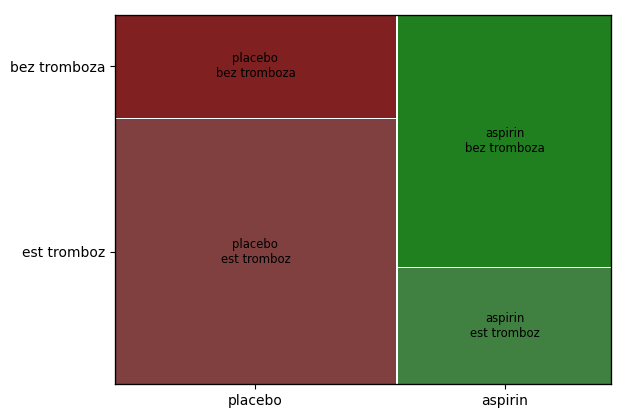

In [33]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

tab = pd.DataFrame({ "est tromboz":[18,6] , "bez tromboza": [7,13]})
display(tab) # выводим ее на экран

tab.index = ('placebo', 'aspirin')

mosaic(tab.stack())
plt.show()

#Разберемся, как здесь отображены наши данные. 
#Ширина и высота каждого прямоугольника пропорциональны наблюдаемым частотам в соответствующих строках и столбцах. 
#Цвет прямоугольника показывает величину стандартизированного остатка; 
#если она по модулю больше 2, то прямоугольник будет полупрозрачным, если больше 4, 
#то соответствующий прямоугольник будет закрашен.

#Итого:
#- размер прямоугольников  соответствует количеству наблюдений.
#- цвет прямоугольников - величине значимости отклонения ожидаемых и наблюдаемых частот в этой ячейке.
#- если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

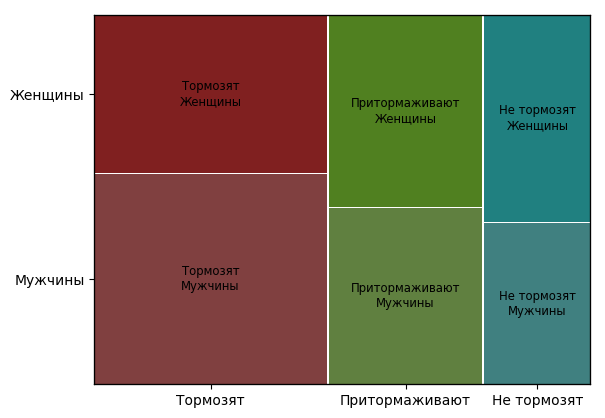

In [32]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

tab = pd.DataFrame({
    'Мужчины': [20, 11, 7],
    'Женщины': [15, 12, 9]
})

tab.index = ('Тормозят', 'Притормаживают', 'Не тормозят')

mosaic(tab.stack())
plt.show()

In [38]:
# Импорт необходимых модулей
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
import numpy as np

def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

    cure = ['Placebo', 'Aspirine']
    effect = ['Normal', 'Trombosis']
    idx = pd.MultiIndex.from_tuples(product(cure, effect))
    data = pd.Series([7, 13, 18, 6], index=idx)
plt.show()